# Linear Regression Example

In [62]:
#imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import statsmodels.api as sm

In [79]:
#Get data
# From: http://archive.ics.uci.edu/ml/datasets/Real+estate+valuation+data+set
data = pd.read_csv("Real estate valuation data set .csv",index_col=0)
print(data.columns)
data.head()

Index(['X1 transaction date', 'X2 house age',
       'X3 distance to the nearest MRT station',
       'X4 number of convenience stores', 'X5 latitude', 'X6 longitude',
       'Y house price of unit area'],
      dtype='object')


,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
No,,,,,,,
1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


# Data Exploration 

In [9]:
#Description of data
table = data.describe().astype('int')
table.to_csv("description.csv")
print(table)

       X1 transaction date  X2 house age  \
count                  414           414   
mean                  2013            17   
std                      0            11   
min                   2012             0   
25%                   2012             9   
50%                   2013            16   
75%                   2013            28   
max                   2013            43   

       X3 distance to the nearest MRT station  \
count                                     414   
mean                                     1083   
std                                      1262   
min                                        23   
25%                                       289   
50%                                       492   
75%                                      1454   
max                                      6488   

       X4 number of convenience stores  X5 latitude  X6 longitude  \
count                              414          414           414   
mean                   

Text(0.5, 0, 'Y house price of unit area')

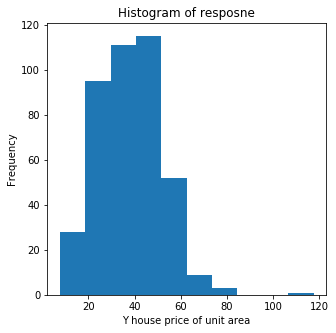

In [38]:
#Histogram of response variable
fig, ax = plt.subplots(nrows=1, ncols=1,figsize=(5,5))
response = np.array(data['Y house price of unit area'])
ax.hist(response)
plt.title("Histogram of resposne")
plt.ylabel('Frequency')
plt.xlabel('Y house price of unit area')


Text(0.5, 0, 'log(Y house price of unit area)')

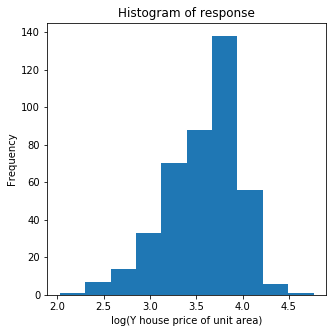

In [46]:
#Response is not normally distributed - should log response variable
fig, ax = plt.subplots(nrows=1, ncols=1,figsize=(5,5))
response = np.array(data['Y house price of unit area'])
ax.hist(np.log(response))
plt.title("Histogram of response")
plt.ylabel('Frequency')
plt.xlabel('log(Y house price of unit area)')
#Seems to be more normally distributed

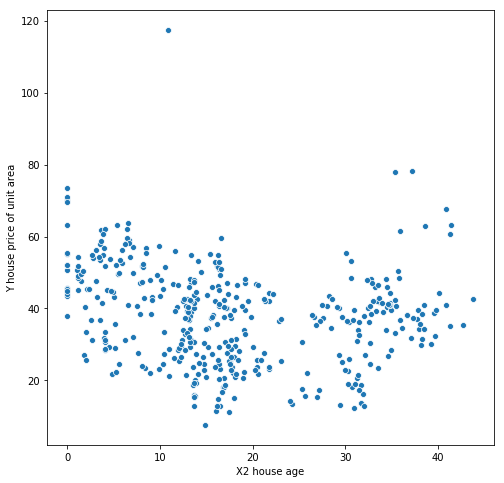

In [55]:
#Relationship with explanatory variables
fig, ax = plt.subplots(nrows=1, ncols=1,figsize=(8,8))
response = np.array(data['Y house price of unit area'])
sns.scatterplot(data['X2 house age'],data['Y house price of unit area'])
#There seems to be a quadratic relationship between a houses age and price 
fig.savefig("plotsave.png", bbox_inches='tight')

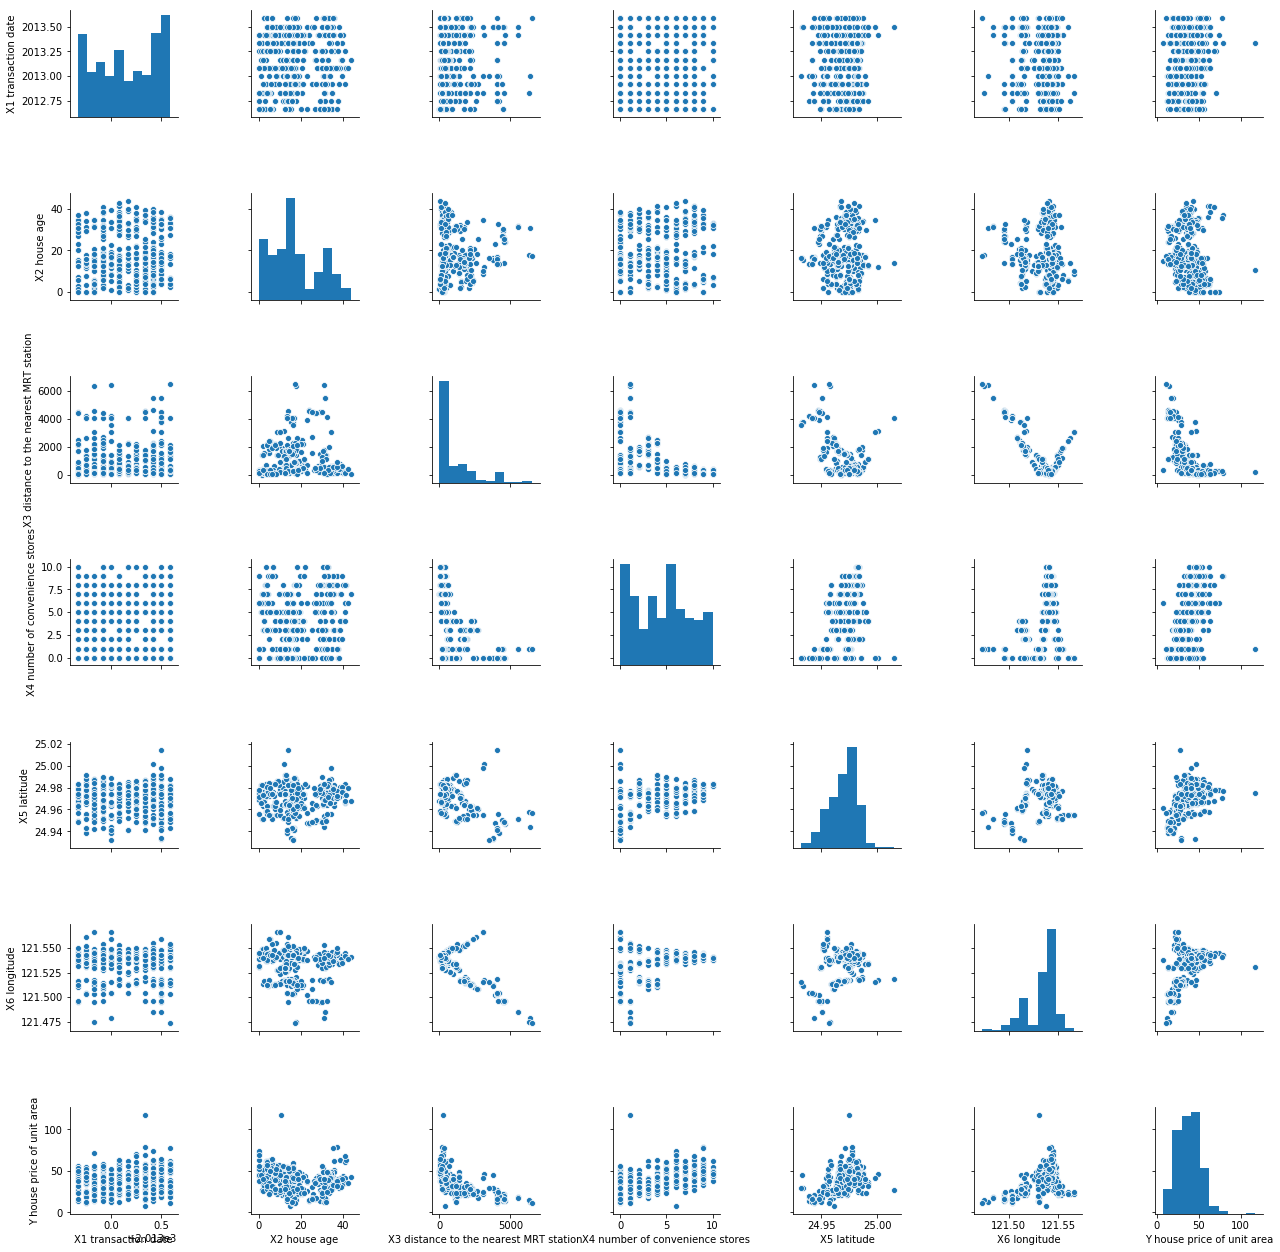

In [56]:
fig = sns.pairplot(data)

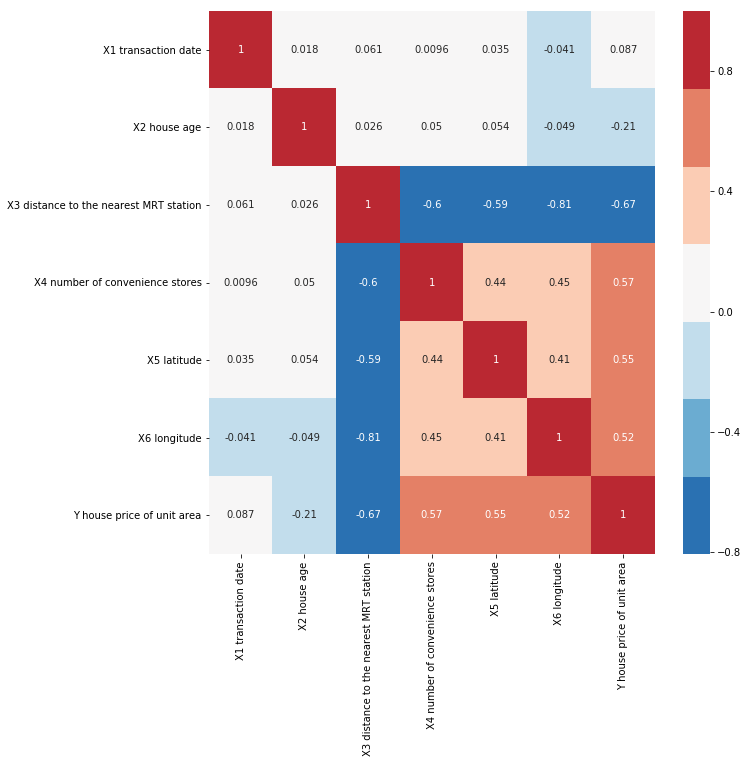

In [57]:
fig, ax = plt.subplots( nrows=1, ncols=1,figsize=(10,10))
sns.heatmap(data.corr(),annot=True,cmap= sns.color_palette("RdBu_r", 7))
fig.savefig("corr_heatmap.png", bbox_inches='tight')

# Linear Regression

In [80]:
# Basic 
X = data[['X1 transaction date', 'X2 house age',
       'X3 distance to the nearest MRT station',
       'X4 number of convenience stores', 'X5 latitude', 'X6 longitude']]
X = sm.add_constant(X)
Y = np.log(data['Y house price of unit area'])

results = sm.OLS(Y,X).fit()

print(results.summary())

                                OLS Regression Results                                
Dep. Variable:     Y house price of unit area   R-squared:                       0.686
Model:                                    OLS   Adj. R-squared:                  0.681
Method:                         Least Squares   F-statistic:                     148.0
Date:                        Tue, 12 Feb 2019   Prob (F-statistic):           4.92e-99
Time:                                14:31:01   Log-Likelihood:                 39.886
No. Observations:                         414   AIC:                            -65.77
Df Residuals:                             407   BIC:                            -37.59
Df Model:                                   6                                         
Covariance Type:                    nonrobust                                         
                                             coef    std err          t      P>|t|      [0.025      0.975]
-----------------------

In [73]:
# Basic 
X = data[['X1 transaction date', 'X2 house age',
       'X3 distance to the nearest MRT station',
       'X4 number of convenience stores', 'X5 latitude', 'X6 longitude']]
X['age squared'] = X['X2 house age']**2
X = sm.add_constant(X)
Y = np.log(data['Y house price of unit area'])
results = sm.OLS(Y,X).fit()

print(results.summary())

                                OLS Regression Results                                
Dep. Variable:     Y house price of unit area   R-squared:                       0.711
Model:                                    OLS   Adj. R-squared:                  0.706
Method:                         Least Squares   F-statistic:                     142.6
Date:                        Tue, 12 Feb 2019   Prob (F-statistic):          3.08e-105
Time:                                13:51:32   Log-Likelihood:                 57.135
No. Observations:                         414   AIC:                            -98.27
Df Residuals:                             406   BIC:                            -66.06
Df Model:                                   7                                         
Covariance Type:                    nonrobust                                         
                                             coef    std err          t      P>|t|      [0.025      0.975]
-----------------------